/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  5.00000006   1.18157572   2.62017232   6.42157434  10.22301655
  14.02446572  14.03385695  14.03103103  14.02821162  14.02539611
  14.02258343]


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


RuntimeError: LaTeX was not able to process the following string:
b'Beam Size Evolution Along First Telescope$'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./ca57ca29b1f9259b6a2471ae99aa0ea9.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file ca57ca29b1f9259b6a2471ae99aa0ea9.aux.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Extra }, or forgotten $.
<recently read> }
                 
l.12 ...eam Size Evolution Along First Telescope$}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./ca57ca29b1f9259b6a2471ae99aa0ea9.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on ca57ca29b1f9259b6a2471ae99aa0ea9.dvi (1 page, 296 bytes).
Transcript written on ca57ca29b1f9259b6a2471ae99aa0ea9.log.


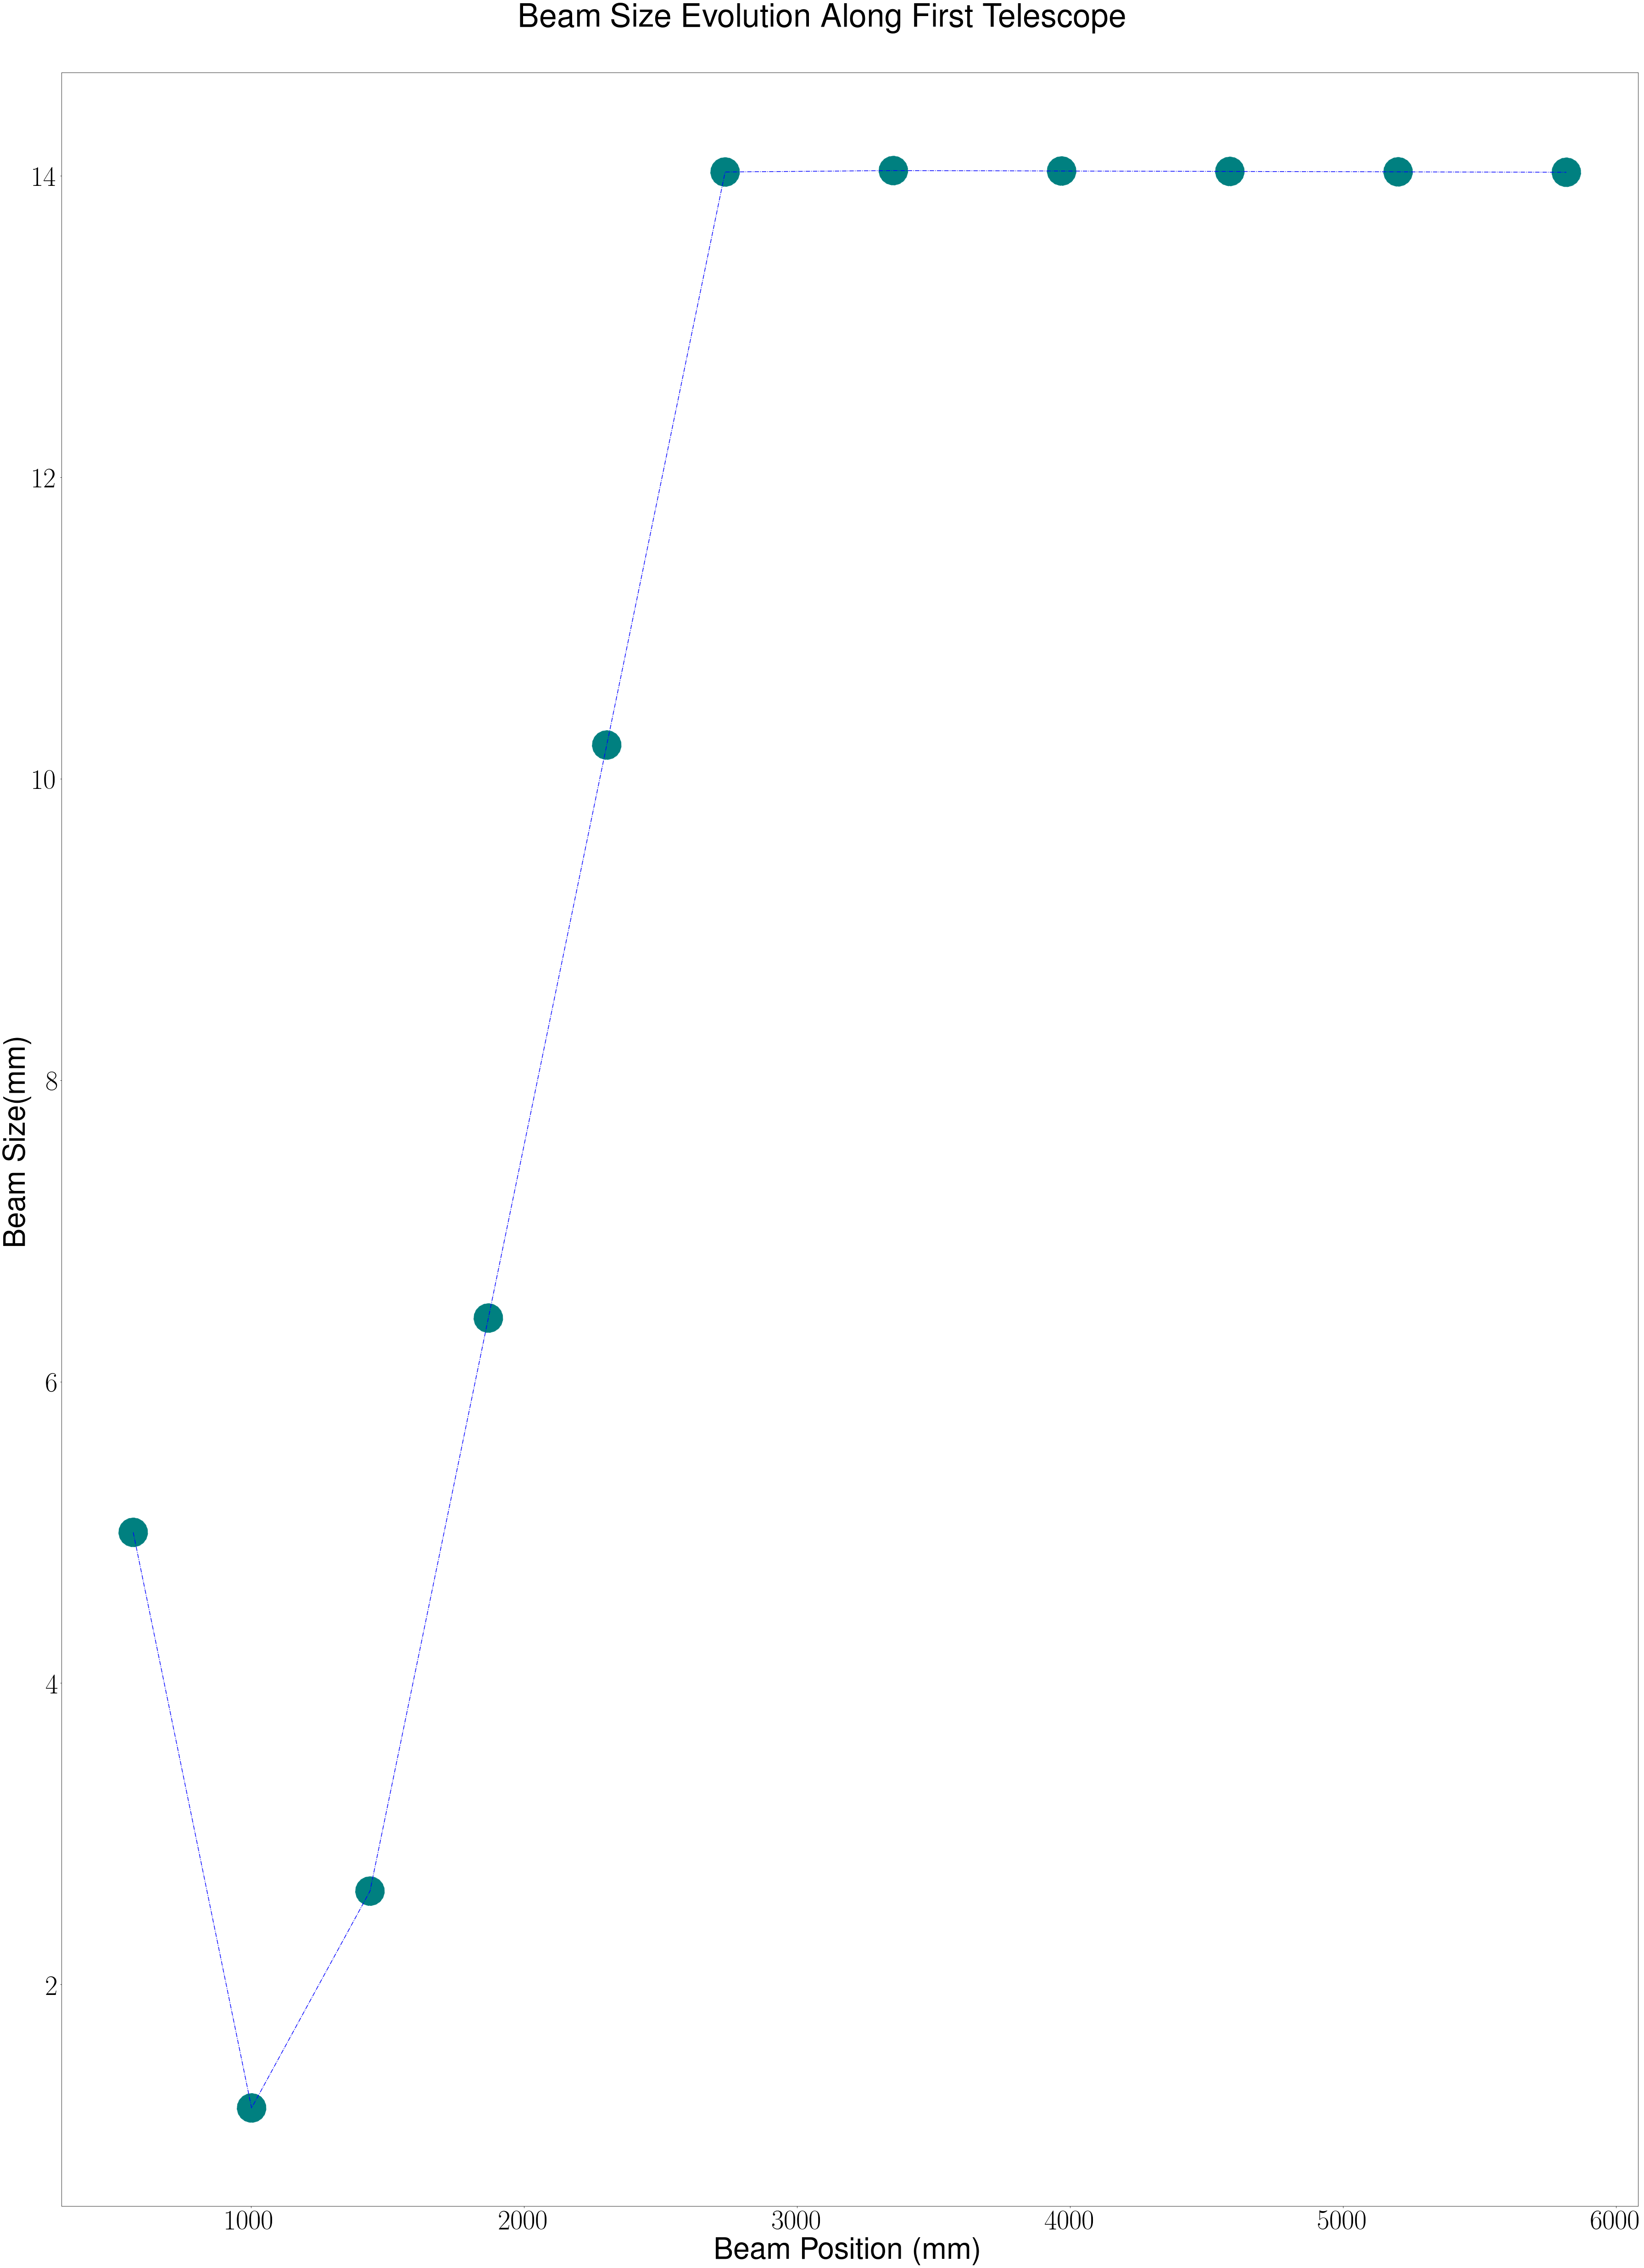

In [45]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

from datetime import datetime
import sys
import os
import time
cpath= Popen(['pwd'], stdout=PIPE, stderr=PIPE).communicate()[0].decode('utf-8').rstrip()

f = filename_generator(cpath)
data_paths = data_pathfiles_generator(cpath)
data_paths.sort()
data_paths.insert(10, data_paths.pop(2))

raw_data = data_generator(data_paths)

waists = np.multiply(2, fit_parameter_extractor(gaussian, raw_data)[2])
print(waists)
pos = []
t = np.arange(568,2800,433.706)
for i in t:
    pos.append(i)

t = np.arange(3352.93, 5820, 616.4)
for i in t:
    pos.append(i)

x = pos
y = waists
cycol = cycle('bgrcmk')
fig = plt.figure(figsize=(50,70))
axes = fig.add_subplot(1, 1, 1)
axes.scatter(x, y, color = 'teal', linestyle = '-.', s=4000)
axes.plot(x,y, c=next(cycol), linestyle = '-.')
axes.tick_params(axis='both',labelsize=55)
axes.legend(fontsize =55)
axes.set_xlabel(str('Beam Position (mm)'), fontsize=55+10)
axes.set_ylabel(str('Beam Size(mm)'), fontsize=55+10)
axes.tick_params(axis='both',labelsize=55+5)
axes.legend(loc = 'upper right', fontsize=55)
fig.suptitle('Beam Size Evolution Along First Telescope$', fontsize=55+15)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

fig.savefig(cpath+ '/'+'collimation' + "-" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S")+'.jpg', dp1=16000)